In [47]:
from functools import partial
import jax
from jax import random, jit, vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt

rng = random.PRNGKey(42)

In [127]:
@partial(jit, static_argnums=(1,))
def sample_bits(rng, n):
    return random.randint(rng, minval=0, maxval=2, shape=(n,))

In [128]:
# flip a coin n times, calculate the average value
# the step and n parameters together seem to influence the variance of the output
@partial(jit, static_argnums=(3,))
def simulate_normal(rng, mean=0., step=1., n=100):
    observations = sample_bits(rng, n)
    observations = observations * 2 - 1
    observations *= step
    observations += mean
    return observations.mean()

In [129]:
sample_count = 10000
rng, *rngs = random.split(rng, sample_count + 1)
samples = vmap(partial(simulate_normal, mean=0., step=1., n=1000))(rng=jnp.array(rngs))
jnp.mean(samples), jnp.var(samples)

(DeviceArray(4.6400044e-05, dtype=float32),
 DeviceArray(0.00099723, dtype=float32))

(array([  33.,  165.,  656., 1903., 2589., 2541., 1505.,  470.,  124.,
          14.]),
 array([-0.11000001, -0.0874    , -0.0648    , -0.0422    , -0.0196    ,
         0.003     ,  0.0256    ,  0.0482    ,  0.0708    ,  0.0934    ,
         0.116     ], dtype=float32),
 <a list of 10 Patch objects>)

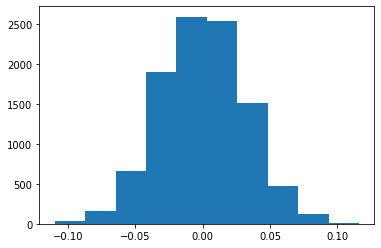

In [130]:
plt.hist(samples)

In [174]:
# https://www.mathsisfun.com/combinatorics/combinations-permutations.html
n = 4
ns = tuple(range(n))
r = 3

def permutations_with_repetitions(ns, r):
    if r == 0:
        yield []
    else:
        for ni in ns:
            for p in permutations_with_repetitions(ns, r-1):
                yield [ni] + p

p = list(permutations_with_repetitions(ns, r))
assert len(p) == n ** r

In [186]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def permutations_without_repetitions(ns, r):
    if r == 0:
        yield []
    else:
        for i, ni in enumerate(ns):
            for p in permutations_without_repetitions(ns[:i] + ns[i+1:], r-1):
                yield [ni] + p

p = list(permutations_without_repetitions(ns, r))
assert len(p) == factorial(n) / factorial(n-r)

In [191]:
def combinations_without_repetition(ns, r):
    if r == 0:
        yield []
    elif r == 1:
        for ni in ns:
            yield [ni]
    else:
        for p in combinations_without_repetition(ns[1:], r-1):
            yield [ns[0]] + p
p = list(combinations_without_repetition(ns, r))
p

[[0, 1, 2], [0, 1, 3]]

In [193]:
## I'm a little stuck on this one above, generating the combinations without repitition